In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings(action="ignore")
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [3]:
df = pd.read_csv("rhotel.csv")
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:
df.shape

(20491, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [6]:
(df.isna().sum()/len(df))*100

Review    0.0
Rating    0.0
dtype: float64

In [7]:
df.Rating.value_counts()

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

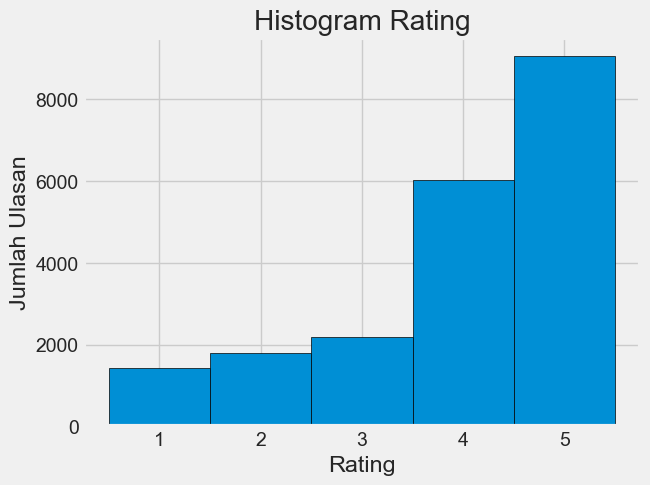

In [8]:
ratings = df['Rating']
bin_edges = np.arange(0.5, 6, 1)  # Mulai dari 0.5 dan berakhir di 5.5, dengan jarak 1 antar bin
# Buat histogram
plt.hist(ratings, bins=bin_edges, edgecolor='black')  
plt.xlabel('Rating')
plt.ylabel('Jumlah Ulasan')
plt.title('Histogram Rating')
plt.grid(True)


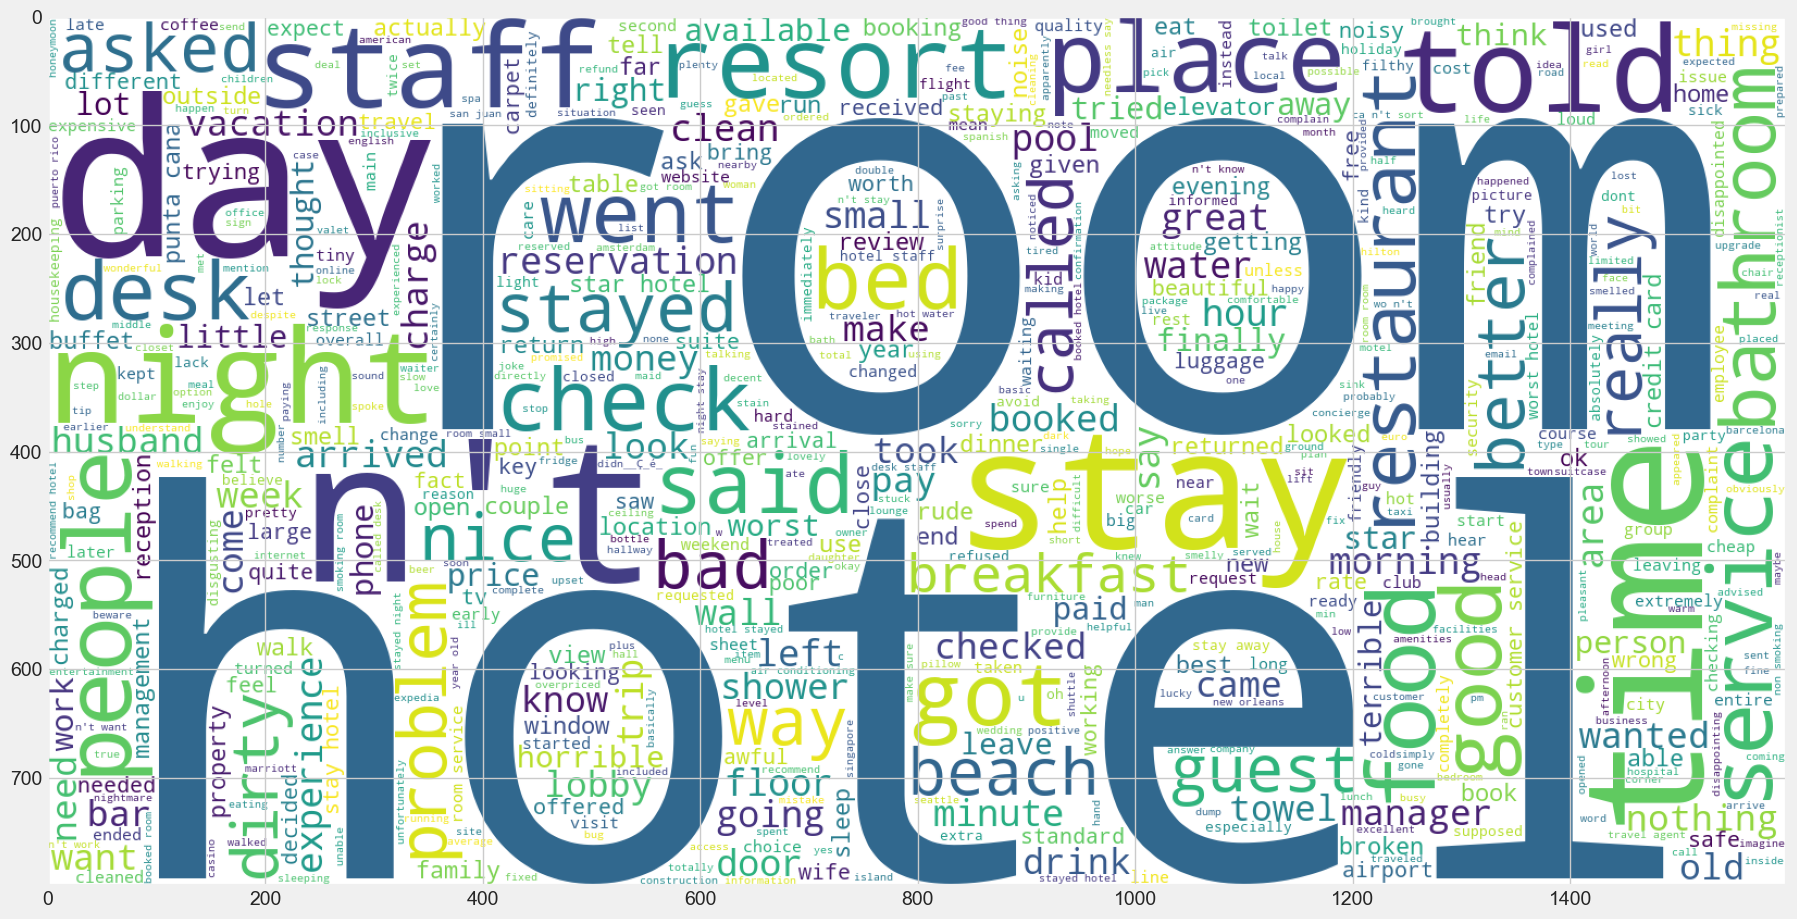

In [9]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc1 = WordCloud(max_words=2000, min_font_size=10, 
                height=800,width=1600,background_color="white").generate(" ".join(df[df["Rating"]==1].Review))
plt.imshow(wc1) # Membuat WordCLoud dengan rating 1

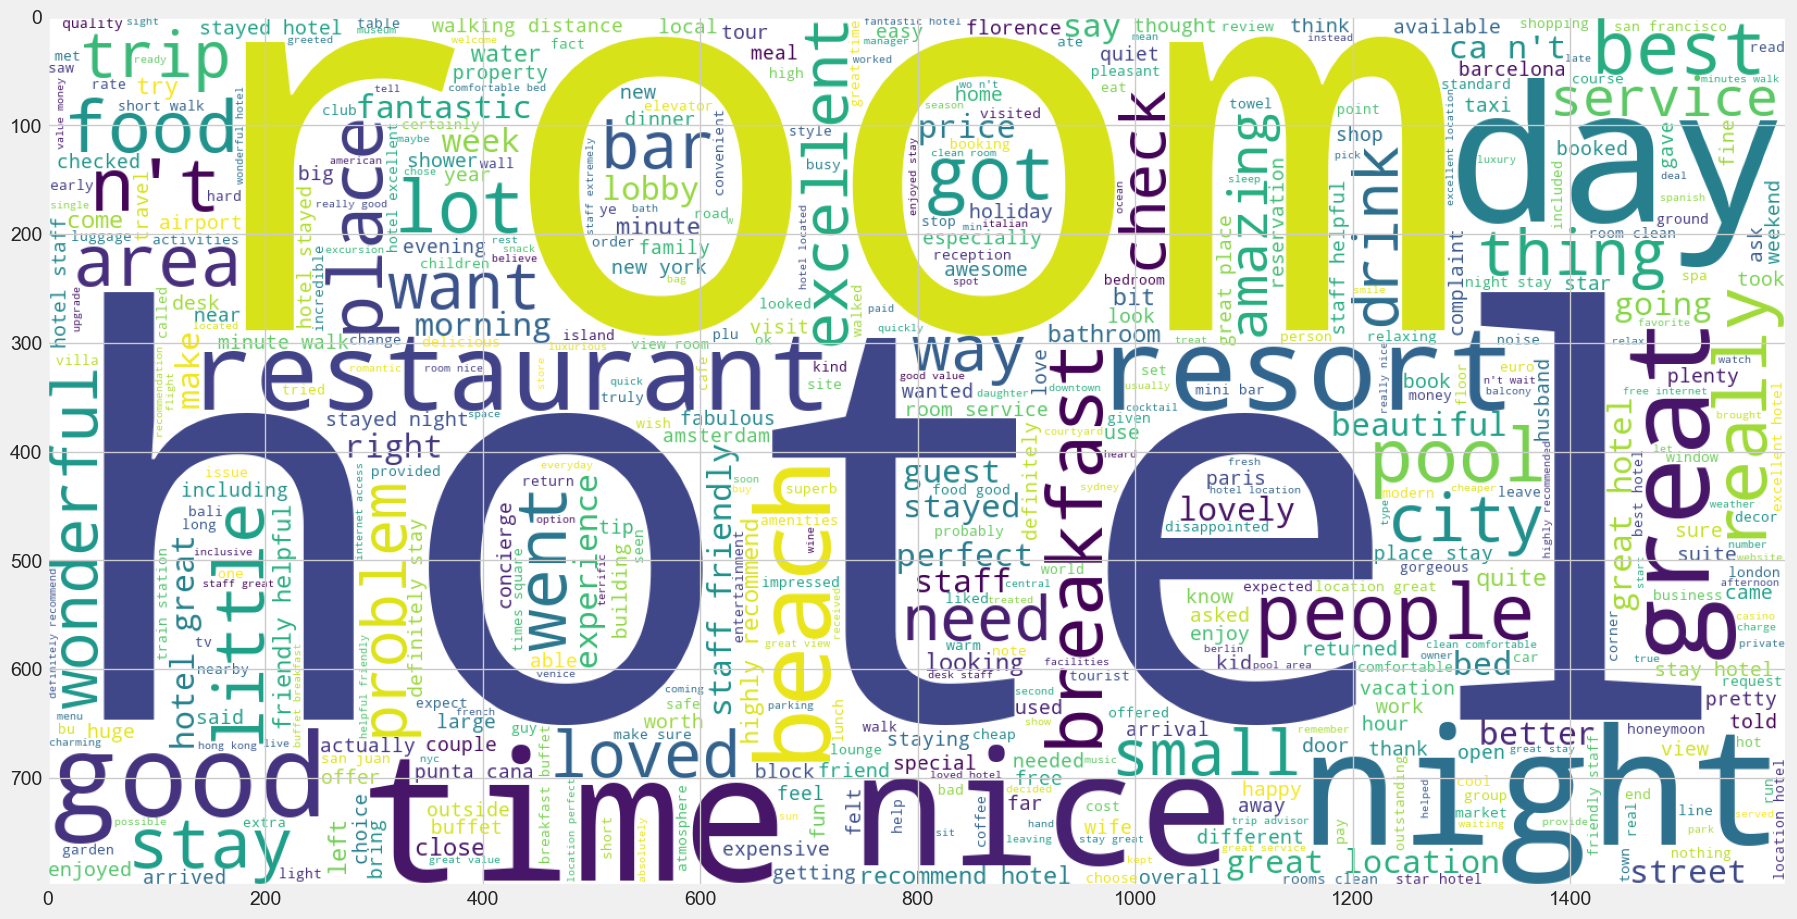

In [18]:
plt.figure(figsize=(20,20))
wc5 = WordCloud(max_words=2000, min_font_size=10, 
                height=800,width=1600,background_color="white").generate(" ".join(df[df["Rating"]==5].Review))
plt.imshow(wc5) #Membuat WordCloud dengan rating 5

In [11]:
def standardize_text(df, field):
    df[field] = df[field].str.replace(r"http\S+", "")
    df[field] = df[field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[field] = df[field].str.replace(r"http","")
    df[field] = df[field].str.replace(r"@/S+","")
    df[field] = df[field].str.replace(r"@"," at ")
    df[field] = df[field].str.lower()
    return df

In [12]:
standardize_text(df,"Review")

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [13]:
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alvin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alvin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alvin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    review = [lemmatizer.lemmatize(word) for word in review]
    review = ' '.join(review)
    corpus.append(review)

In [15]:
def sentiment(review):
    if review>=3:
        return 1
    else:
        return 0
df['Sentiment']= df['Rating'].apply(sentiment)

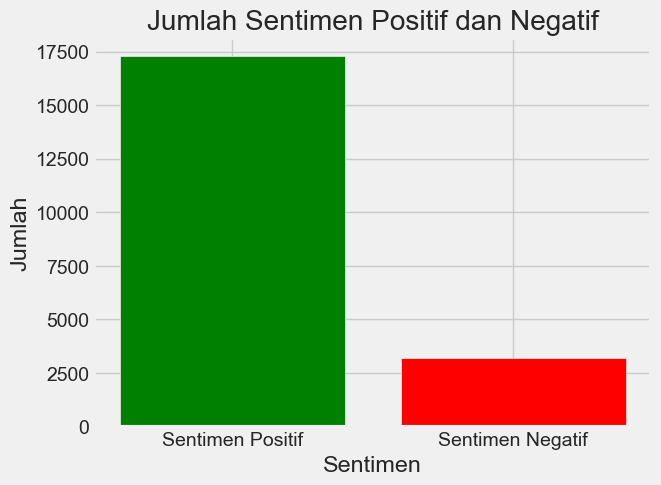

In [16]:
df['Sentiment'] = df['Rating'].apply(sentiment)

# Menghitung jumlah sentimen 1 dan 0
sentiment_counts = df['Sentiment'].value_counts()

# Membuat barplot
plt.bar(['Sentimen Positif', 'Sentimen Negatif'], sentiment_counts, color=['green', 'red'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Jumlah Sentimen Positif dan Negatif')
plt.show()

NameError: name 'df' is not defined

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1, 3), max_features=10000, tokenizer = word_tokenize)
X = tfidf.fit_transform(corpus)
y = df['Sentiment']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16392, 10000)
(16392,)
(4099, 10000)
(4099,)


In [22]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

In [23]:
logreg_score = logreg.score(X_test, y_test)
print("Accuracy of LogisticRegression Classifier:", logreg_score)

Accuracy of LogisticRegression Classifier: 0.9309587704318126


In [24]:
from sklearn.metrics import classification_report

In [25]:
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.63      0.74       625
           1       0.94      0.99      0.96      3474

    accuracy                           0.93      4099
   macro avg       0.91      0.81      0.85      4099
weighted avg       0.93      0.93      0.93      4099



In [36]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNN classifier and fit it to the training data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn.predict(X_test)


In [29]:
knn_score = knn.score(X_test, y_test)
print("Accuracy of k-nearest neighbors Classifier:", knn_score)

Accuracy of k-nearest neighbors Classifier: 0.8799707245669676


In [37]:
print("Classification Report for KNN:")
print(classification_report(y_test, y_pred_knn))

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.68      0.40      0.51       625
           1       0.90      0.97      0.93      3474

    accuracy                           0.88      4099
   macro avg       0.79      0.69      0.72      4099
weighted avg       0.87      0.88      0.87      4099



In [45]:
comparison = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression'],
    'Accuracy': [accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_logreg)],
    'Precision': [classification_report(y_test, y_pred_knn, output_dict=True)['weighted avg']['precision'],
                  classification_report(y_test, y_pred_logreg, output_dict=True)['weighted avg']['precision']],
    'Recall': [classification_report(y_test, y_pred_knn, output_dict=True)['weighted avg']['recall'],
               classification_report(y_test, y_pred_logreg, output_dict=True)['weighted avg']['recall']],
    'F1-Score': [classification_report(y_test, y_pred_knn, output_dict=True)['weighted avg']['f1-score'],
                 classification_report(y_test, y_pred_logreg, output_dict=True)['weighted avg']['f1-score']]
})

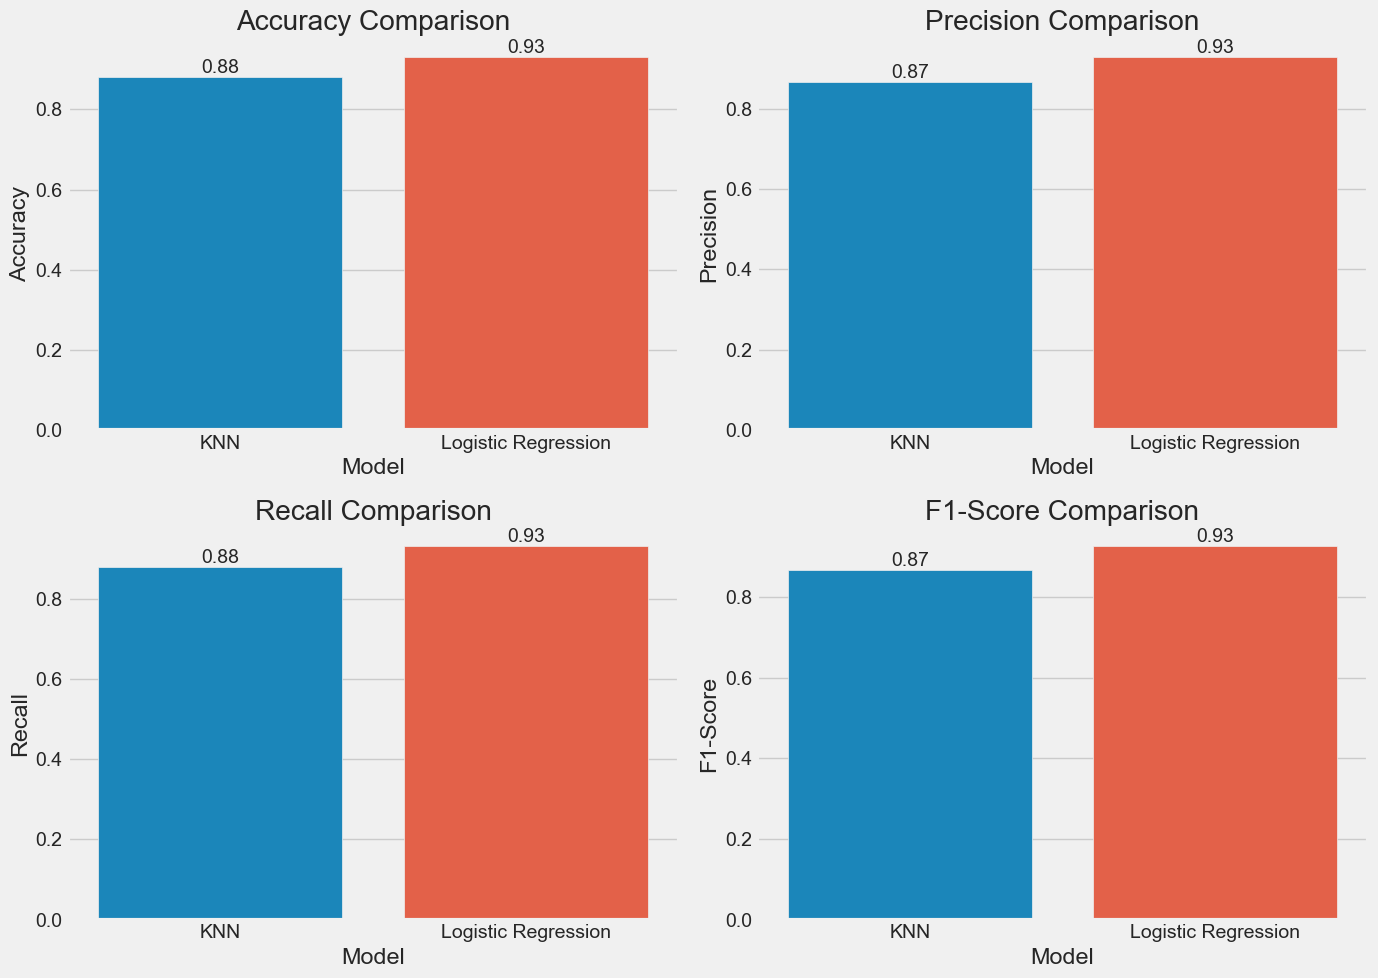

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot accuracy
sns.barplot(ax=axes[0, 0], x='Model', y='Accuracy', data=comparison)
axes[0, 0].set_title('Accuracy Comparison')
for i in range(comparison.shape[0]):
    axes[0, 0].text(i, comparison['Accuracy'].iloc[i], round(comparison['Accuracy'].iloc[i], 2), ha='center', va='bottom')

# Plot precision
sns.barplot(ax=axes[0, 1], x='Model', y='Precision', data=comparison)
axes[0, 1].set_title('Precision Comparison')
for i in range(comparison.shape[0]):
    axes[0, 1].text(i, comparison['Precision'].iloc[i], round(comparison['Precision'].iloc[i], 2), ha='center', va='bottom')

# Plot recall
sns.barplot(ax=axes[1, 0], x='Model', y='Recall', data=comparison)
axes[1, 0].set_title('Recall Comparison')
for i in range(comparison.shape[0]):
    axes[1, 0].text(i, comparison['Recall'].iloc[i], round(comparison['Recall'].iloc[i], 2), ha='center', va='bottom')

# Plot F1-Score
sns.barplot(ax=axes[1, 1], x='Model', y='F1-Score', data=comparison)
axes[1, 1].set_title('F1-Score Comparison')
for i in range(comparison.shape[0]):
    axes[1, 1].text(i, comparison['F1-Score'].iloc[i], round(comparison['F1-Score'].iloc[i], 2), ha='center', va='bottom')

# Adjust layout and show plot
plt.tight_layout()
plt.show()